In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
! wget https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

--2021-06-16 11:33:21--  https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 135.181.209.10, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224374704 (214M) [application/x-gzip]
Saving to: ‘spark-3.1.1-bin-hadoop2.7.tgz’

spark-3.1.1-bin-had 100%[===================>] 213.98M  54.2MB/s    in 4.3s    

2021-06-16 11:33:25 (50.2 MB/s) - ‘spark-3.1.1-bin-hadoop2.7.tgz’ saved [224374704/224374704]



In [ ]:
! tar xf /content/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
! pip install  findspark

In [ ]:
! pip install pyspark==2.3.0

     |████████████████████████████████| 211.9MB 75kB/s 
     |████████████████████████████████| 194kB 20.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.3.0-py2.py3-none-any.whl size=212271919 sha256=7304b9edb997df44fd0ab5e5361b79dfdda30de30ca477adb640f811ff3813a3
  Stored in directory: /root/.cache/pip/wheels/d9/db/ff/e6f3a8a564163ea64bc2072357e77b3404d10f91be48352796
Successfully built pyspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .config('spark.driver.memory','45G')\
        .config('spark.driver.maxResultSize', '10G')\
        .getOrCreate()

# from pyspark.sql import SparkSession

# spark = SparkSession.builder\
# .master("local")\
# .appName("Colab")\
# .config('spark.ui.port', '4050')\
# .config('spark.executor.memory', '4G')\
# .config('spark.driver.memory', '45G')\
# .config('spark.driver.maxResultSize', '10G')\
# .getOrCreate()
#         # conf = (conf.setMaster('local[*]')
#         # .set('spark.executor.memory', '4G')
#         # .set('spark.driver.memory', '45G')
#         # .set('spark.driver.maxResultSize', '10G'))

In [ ]:
spark
#print partition

In [ ]:


# from pyspark.sql import SparkSession

# spark = SparkSession.builder \
#   .master('local[*]') \
#   .config('spark.ui.port', '4050')\
#   .set('spark.executor.memory', '4G')
#   .set('spark.driver.memory', '45G')
#   .set('spark.driver.maxResultSize', '10G'))
#   .appName('Colab') \
#   .getOrCreate()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-06-16 11:34:46--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.174.24.146, 52.20.113.123, 54.159.229.235, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.174.24.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  13.5MB/s    in 1.0s    

2021-06-16 11:34:48 (13.5 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://a68eae1f70eb.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p

In [ ]:
spark_df = spark.read.csv("/content/drive/MyDrive/abd/kindle_reviews.csv", header=True, inferSchema=True)

In [ ]:
spark_df.describe().show()

+-------+----------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+
|summary|             _c0|                asin|             helpful|           overall|          reviewText|          reviewTime|          reviewerID|reviewerName|             summary|      unixReviewTime|
+-------+----------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+
|  count|          982820|              982815|              982815|            982619|              982597|              982605|              982598|      978957|              982385|              982397|
|   mean|        491309.0|                null|1.3761077877551022E9| 4.347801131466011|                null|   270.1666666666667|   488.4230769230769|         NaN|            I

In [ ]:
spark_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- helpful: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: string (nullable = true)



In [ ]:
spark_df.rdd.getNumPartitions()

6

In [ ]:
spark_to_pandas = spark_df.select("*").toPandas()

### Import Library

In [ ]:
df = spark_to_pandas.copy()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.5.0


#  Dataset Preprocessing

In [ ]:
df['text'] = df['reviewText']
df["sentiment"] = df["overall"]
df.head()

,_c0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,text,sentiment
0,0,B000F83SZQ,"[0, 0]",5.0,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,I enjoy vintage books and movies so I enjoyed ...,5.0
1,1,B000F83SZQ,"[2, 2]",4.0,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,This book is a reissue of an old one; the auth...,4.0
2,2,B000F83SZQ,"[2, 2]",4.0,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,This was a fairly interesting read. It had ol...,4.0
3,3,B000F83SZQ,"[1, 1]",5.0,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"""Elaine H. Turley """"Montana Songbird""""""",I really liked it.,1392768000,I'd never read any of the Amy Brewster mysteri...,5.0
4,4,B000F83SZQ,"[0, 1]",4.0,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,"If you like period pieces - clothing, lingo, y...",4.0


In [ ]:
df = df.drop(df.columns[:-2], axis=1)

In [ ]:
df['sentiment'] = df.sentiment.values.astype(np.int32)

In [ ]:
index_names = df[ df['sentiment'] ==-2147483648].index
df.drop(index_names, inplace = True)

In [ ]:
df

,text,sentiment
0,I enjoy vintage books and movies so I enjoyed ...,5
1,This book is a reissue of an old one; the auth...,4
2,This was a fairly interesting read. It had ol...,4
3,I'd never read any of the Amy Brewster mysteri...,5
4,"If you like period pieces - clothing, lingo, y...",4
...,...,...
982815,Yasss hunny! This is a great read. That Dre is...,5
982816,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,5
982817,Great book! Cherika was a fool. She let that m...,5
982818,When I say this was an excellent book please b...,5


In [ ]:
df['sentiment'] = df['sentiment'].replace([1,2,3],'Negative')
df['sentiment'] = df['sentiment'].replace([4,5],'Positive')

In [ ]:
df.sentiment.unique()

array([5, 4, 3, 2, 1], dtype=int32)

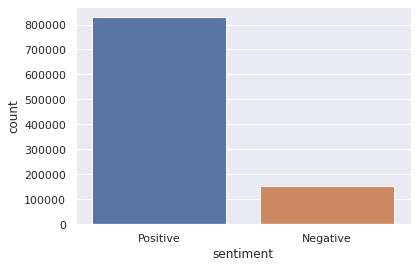

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")


ax = sns.countplot(x="sentiment", data=df)


### Stemming/ Lematization & Stopwords


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

In [ ]:
# df.to_csv("post_process.csv",index=False)

In [ ]:
df.to_csv( "/content/drive/MyDrive/abd/pre_processed_df.csv", index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/abd/pre_processed_df.csv")

In [ ]:
df.dropna(axis=0, how="any",inplace=True)
df['text'] = df['text'].astype(str)

In [ ]:
df

,text,sentiment
0,enjoy vintage books movies enjoyed reading boo...,Positive
1,book reissue old one author born 1910 era say ...,Positive
2,fairly interesting read old style terminology ...,Positive
3,never read amy brewster mysteries one really h...,Positive
4,like period pieces clothing lingo enjoy myster...,Positive
...,...,...
982614,yasss hunny great read dre mess cherika refuse...,Positive
982615,enjoyed book beginning end far lex hoe sneaky ...,Positive
982616,great book cherika fool let man get away much ...,Positive
982617,say excellent book please believe definitely p...,Positive



### Positive Words

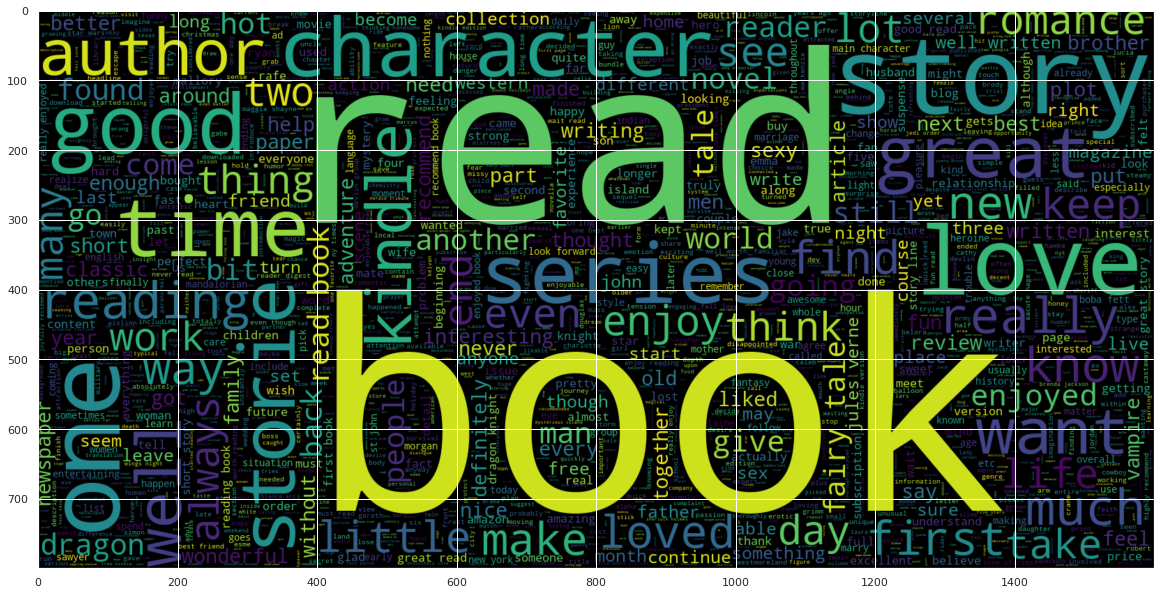

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
df_positive = df[:1000].copy()
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_positive[df_positive.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

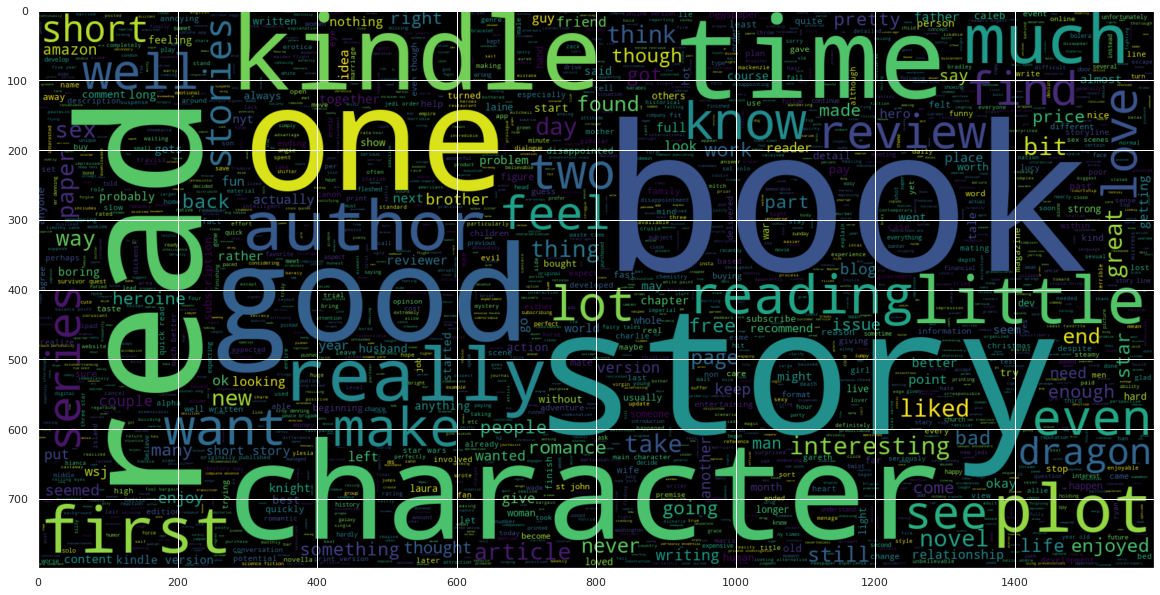

In [ ]:
df_negative = df[:1000].copy()
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_negative[df_negative.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 786074
Test Data size 196519


In [ ]:
train_data.head(10)

,text,sentiment
44793,bridge fantastic tale crazy one pretty written...,Positive
198300,loved book lot hope least 3 series really wish...,Positive
704412,really enjoyed story found interesting choice ...,Positive
703330,author brad branham definite knack walking wal...,Positive
848743,loved wild read wild looked author proceeded r...,Positive
573075,loved book much brought 2 series far fourth bo...,Positive
97725,wonderful love paranormal romance immediately ...,Positive
56834,knowledge words needs improved lived wonderful...,Positive
402664,went south america back speaking friend region...,Positive
80326,rode dinosaur school know possible dinosaurs d...,Positive


# Tokenization

In [ ]:
df.dropna(axis=0, how="any",inplace=True)
df['text'] = df['text'].astype(str)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 233856


In [ ]:
# vocab_size = 250083

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (786074, 30)
Testing X Shape: (196519, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()

### Label Encoding 

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)



print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (786074, 1)
y_test shape: (196519, 1)


# Word Emdedding

In [ ]:
# #Biar Tidak Makan Waktu
# x_train = pd.read_csv("/content/drive/MyDrive/abd/x_train")

# x_test = pd.read_csv("/content/drive/MyDrive/abd/x_test")

# y_train = pd.read_csv("/content/drive/MyDrive/abd/y_train")

# y_test = pd.read_csv("/content/drive/MyDrive/abd/y_test")



In [ ]:
GLOVE_EMB = '/content/drive/MyDrive/abd/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# vocab_size = 300

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training - LSTM

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

### Optimization Algorithm
> Adam
### Callbacks
> ReduceLR

## TF Mirrored Strategy

In [ ]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()

INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO


In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy()
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
with mirrored_strategy.scope():
  keras_model = tf.keras.models.clone_model(model)

keras_model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [ ]:
# history = keras_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])


In [ ]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
#               metrics=['accuracy'])
# ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
#                                      min_lr = 0.01,
#                                      monitor = 'val_loss',
#                                      verbose = 1)

In [ ]:
history = keras_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
768/768 [==============================] - 310s 357ms/step - loss: 0.3344 - accuracy: 0.8634 - val_loss: 0.2823 - val_accuracy: 0.8842
Epoch 2/10
768

In [ ]:
keras_model.save("/content/drive/MyDrive/abd/keras_post_model.h5")

In [ ]:
# model = tf.keras.models.load_model('/content/drive/MyDrive/abd/model.h5')


# Model Evaluation

In [ ]:
keras_model.evaluate(x_test,y_test)

6142/6142 [==============================] - 133s 22ms/step - loss: 0.2707 - accuracy: 0.8889


[0.2707189917564392, 0.8889166116714478]

### Classification Scores

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = keras_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

20/20 [==============================] - 6s 154ms/step


In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.66      0.60      0.63     30708
    Positive       0.93      0.94      0.93    165811

    accuracy                           0.89    196519
   macro avg       0.79      0.77      0.78    196519
weighted avg       0.89      0.89      0.89    196519



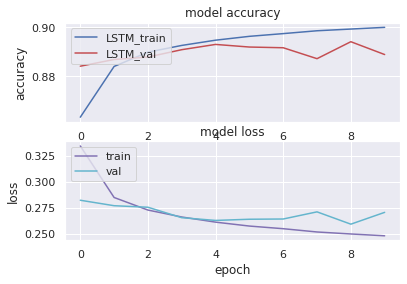

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

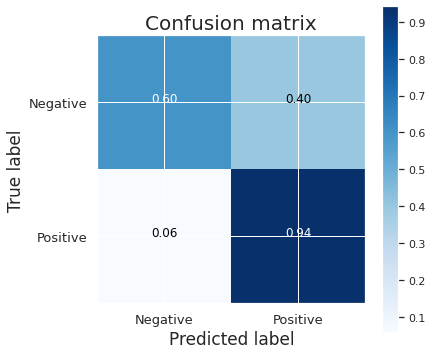

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()